In [1]:
# Import modules
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import datetime as dt
from datetime import datetime
%matplotlib inline

In [2]:
# Read whale_returns.csv data into DataFrame whl_df
whl_df = pd.read_csv ('Resources/whale_returns.csv')

# Count null values in whl_df
whl_df.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [3]:
# Drop null values in whl_df
whl_df.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
# Convert whl_df 'Date' column to datetime
whl_df['Date'] = pd.to_datetime(whl_df['Date'])

In [5]:
# Sort the values of whl_df by 'Date' column in ascending order
whl_df.sort_values(by=['Date'],inplace=True)
whl_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [6]:
# Set the range of Dates to 2015-03-02 through 2019-04-23
whl_df_lkup = (whl_df['Date'] > '2015-03-02') & (whl_df['Date'] <= '2019-04-08')
whl_df = whl_df.loc[whl_df_lkup]
whl_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1039,2019-04-02,0.000193,-0.005619,-0.006623,0.001152
1040,2019-04-03,0.003562,0.001305,0.005193,0.003252
1041,2019-04-04,0.001255,0.010630,0.008459,-0.008037
1042,2019-04-05,0.006880,0.006484,0.009357,0.006128


In [7]:
# Reset the index of whl_df and drop 'index' column
whl_df.reset_index(inplace=True)
whl_df.drop(columns=['index'], inplace=True)
whl_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2,2015-03-05,0.004016,0.004076,0.002355,0.006726
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1038,2019-04-02,0.000193,-0.005619,-0.006623,0.001152
1039,2019-04-03,0.003562,0.001305,0.005193,0.003252
1040,2019-04-04,0.001255,0.010630,0.008459,-0.008037
1041,2019-04-05,0.006880,0.006484,0.009357,0.006128


In [8]:
# Read sp500_history.csv into DataFrame sp_df
sp_df = pd.read_csv('Resources/sp500_history.csv')

In [9]:
# Check Data Types in sp_df
sp_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Convert sp_df 'Date' column to datetime
sp_df['Date'] = pd.to_datetime(sp_df['Date'])

# Remove '$' from 'Close' column and convert to float
sp_df['Close'] = sp_df['Close'].str.replace('$', '').astype(float)

In [11]:
# Sort the values of sp_df by 'Date' column in ascending order
sp_df.sort_values(by=['Date'],inplace=True)
sp_df

,Date,Close
1648,2012-10-01,1444.49
1647,2012-10-02,1445.75
1646,2012-10-03,1450.99
1645,2012-10-04,1461.40
1644,2012-10-05,1460.93
...,...,...
4,2019-04-16,2907.06
3,2019-04-17,2900.45
2,2019-04-18,2905.03
1,2019-04-22,2907.97


In [12]:
# Set the range of Dates to 2015-03-02 through 2019-04-23
sp_df_lkup = (sp_df['Date'] > '2015-03-01') & (sp_df['Date'] <= '2019-04-23')
sp_df = sp_df.loc[sp_df_lkup]
sp_df

,Date,Close
1043,2015-03-02,2117.39
1042,2015-03-03,2107.78
1041,2015-03-04,2098.53
1040,2015-03-05,2101.04
1039,2015-03-06,2071.26
...,...,...
4,2019-04-16,2907.06
3,2019-04-17,2900.45
2,2019-04-18,2905.03
1,2019-04-22,2907.97


In [13]:
# Reset the index of sp_df and drop 'index' column
sp_df.reset_index(inplace=True)
sp_df.drop(columns=['index'], inplace=True)
sp_df

,Date,Close
0,2015-03-02,2117.39
1,2015-03-03,2107.78
2,2015-03-04,2098.53
3,2015-03-05,2101.04
4,2015-03-06,2071.26
...,...,...
1039,2019-04-16,2907.06
1040,2019-04-17,2900.45
1041,2019-04-18,2905.03
1042,2019-04-22,2907.97


In [14]:
# Calculate Daily Returns of sp_df
close_px = sp_df['Close']
sp_dly_ret = close_px / close_px.shift(1) - 1

# Append Daily Returns sp_dly_ret to new column in sp_df named 'S&P 500'
sp_df['S&P 500'] = sp_dly_ret

# Drop nulls from sp_df
sp_df.dropna()

# Drop Column 'Close' from sp_df
sp_df.drop(columns=['Close'], inplace=True)
sp_df

,Date,S&P 500
0,2015-03-02,NaN
1,2015-03-03,-0.004539
2,2015-03-04,-0.004389
3,2015-03-05,0.001196
4,2015-03-06,-0.014174
...,...,...
1039,2019-04-16,0.000509
1040,2019-04-17,-0.002274
1041,2019-04-18,0.001579
1042,2019-04-22,0.001012


In [15]:
# Drop first row, reset index and rename 'Date' column to 'Date_1'
sp_df.drop(sp_df.index[0], inplace=True)
sp_df.reset_index(inplace=True)
sp_df.drop(columns=['index'], inplace=True)
sp_df.rename(columns={'Date':'Date_1'}, inplace=True)
sp_df

,Date_1,S&P 500
0,2015-03-03,-0.004539
1,2015-03-04,-0.004389
2,2015-03-05,0.001196
3,2015-03-06,-0.014174
4,2015-03-09,0.003944
...,...,...
1038,2019-04-16,0.000509
1039,2019-04-17,-0.002274
1040,2019-04-18,0.001579
1041,2019-04-22,0.001012


In [16]:
# Read algo_returns.csv data into DataFrame algo_df
algo_df = pd.read_csv('Resources/algo_returns.csv')
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [17]:
# Convert algo_df 'Date' column to datetime
algo_df['Date'] = pd.to_datetime(algo_df['Date'])

In [18]:
# Sort the values of algo_df by 'Date' column in ascending order
algo_df.sort_values(by=['Date'],inplace=True)
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [19]:
# Set the range of Dates to 2015-03-02 through 2019-04-23
algo_df_lkup = (algo_df['Date'] > '2015-03-02') & (algo_df['Date'] <= '2019-04-23')
algo_df = algo_df.loc[algo_df_lkup]
algo_df

,Date,Algo 1,Algo 2
192,2015-03-03,-0.001942,-0.000949
193,2015-03-04,-0.008589,0.002416
194,2015-03-05,-0.000955,0.004323
195,2015-03-06,-0.004957,-0.011460
196,2015-03-09,-0.005447,0.001303
...,...,...,...
1230,2019-04-16,-0.006945,0.002899
1231,2019-04-17,-0.010301,-0.005228
1232,2019-04-18,-0.000588,-0.001229
1233,2019-04-22,0.000677,-0.001936


In [20]:
# Reset the index of sp_df and drop 'index' column and rename 'Date' column to 'Date_2'
algo_df.reset_index(inplace=True)
algo_df.drop(columns=['index'], inplace=True)
algo_df.rename(columns={'Date':'Date_2'}, inplace=True)
algo_df

,Date_2,Algo 1,Algo 2
0,2015-03-03,-0.001942,-0.000949
1,2015-03-04,-0.008589,0.002416
2,2015-03-05,-0.000955,0.004323
3,2015-03-06,-0.004957,-0.011460
4,2015-03-09,-0.005447,0.001303
...,...,...,...
1038,2019-04-16,-0.006945,0.002899
1039,2019-04-17,-0.010301,-0.005228
1040,2019-04-18,-0.000588,-0.001229
1041,2019-04-22,0.000677,-0.001936


In [21]:
# Combine Whale, Algorithmic and S&P 500 Returns into single DataFrame
ret_df = pd.concat([whl_df, algo_df, sp_df], axis="columns", join="inner")
ret_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date_2,Algo 1,Algo 2,Date_1,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2015-03-03,-0.001942,-0.000949,2015-03-03,-0.004539
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,2015-03-04,-0.004389
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,2015-03-05,0.001196
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,2015-03-06,-0.014174
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,2015-03-09,0.003944
...,...,...,...,...,...,...,...,...,...,...
1038,2019-04-02,0.000193,-0.005619,-0.006623,0.001152,2019-04-16,-0.006945,0.002899,2019-04-16,0.000509
1039,2019-04-03,0.003562,0.001305,0.005193,0.003252,2019-04-17,-0.010301,-0.005228,2019-04-17,-0.002274
1040,2019-04-04,0.001255,0.010630,0.008459,-0.008037,2019-04-18,-0.000588,-0.001229,2019-04-18,0.001579
1041,2019-04-05,0.006880,0.006484,0.009357,0.006128,2019-04-22,0.000677,-0.001936,2019-04-22,0.001012


In [22]:
# Compare Date columns to find where dates do not match
ret_df.loc[ret_df['Date'] < ret_df['Date_1']]

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date_2,Algo 1,Algo 2,Date_1,S&P 500
86,2015-07-03,0.000000,0.000000,0.000000,0.000000,2015-07-06,-0.014638,-0.004958,2015-07-06,-0.003862
87,2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,2015-07-07,-0.004611,-0.002519,2015-07-07,0.006081
88,2015-07-07,0.000597,0.003962,0.004652,-0.007634,2015-07-08,-0.013853,-0.015528,2015-07-08,-0.016653
89,2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,2015-07-09,0.014090,0.003624,2015-07-09,0.002262
90,2015-07-09,0.007472,0.003887,0.000441,0.017670,2015-07-10,0.003362,0.014381,2015-07-10,0.012338
...,...,...,...,...,...,...,...,...,...,...
1038,2019-04-02,0.000193,-0.005619,-0.006623,0.001152,2019-04-16,-0.006945,0.002899,2019-04-16,0.000509
1039,2019-04-03,0.003562,0.001305,0.005193,0.003252,2019-04-17,-0.010301,-0.005228,2019-04-17,-0.002274
1040,2019-04-04,0.001255,0.010630,0.008459,-0.008037,2019-04-18,-0.000588,-0.001229,2019-04-18,0.001579
1041,2019-04-05,0.006880,0.006484,0.009357,0.006128,2019-04-22,0.000677,-0.001936,2019-04-22,0.001012


In [23]:
# Drop the rows where the dates do not match
ret_df.drop(ret_df.index[86:1043], inplace=True)
ret_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date_2,Algo 1,Algo 2,Date_1,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2015-03-03,-0.001942,-0.000949,2015-03-03,-0.004539
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,2015-03-04,-0.004389
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,2015-03-05,0.001196
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,2015-03-06,-0.014174
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,2015-03-09,0.003944
...,...,...,...,...,...,...,...,...,...,...
81,2015-06-26,-0.010598,-0.004986,0.003986,-0.005103,2015-06-26,0.003362,-0.002704,2015-06-26,-0.000390
82,2015-06-29,-0.019129,-0.006835,-0.019384,-0.019997,2015-06-29,0.000903,-0.023736,2015-06-29,-0.020866
83,2015-06-30,0.006073,0.001550,0.004071,0.011826,2015-06-30,0.002524,0.007395,2015-06-30,0.002658
84,2015-07-01,-0.001365,0.002100,0.005815,-0.001304,2015-07-01,-0.007847,0.002724,2015-07-01,0.006936


In [24]:
# Drop the 'Date_1' and 'Date_2' columns
ret_df.drop(columns=['Date_1','Date_2'], inplace=True)
ret_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
81,2015-06-26,-0.010598,-0.004986,0.003986,-0.005103,0.003362,-0.002704,-0.000390
82,2015-06-29,-0.019129,-0.006835,-0.019384,-0.019997,0.000903,-0.023736,-0.020866
83,2015-06-30,0.006073,0.001550,0.004071,0.011826,0.002524,0.007395,0.002658
84,2015-07-01,-0.001365,0.002100,0.005815,-0.001304,-0.007847,0.002724,0.006936


In [25]:
# Set index of ret_df to 'Date' column
ret_df.set_index(['Date'], inplace=True)
ret_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2015-06-26,-0.010598,-0.004986,0.003986,-0.005103,0.003362,-0.002704,-0.000390
2015-06-29,-0.019129,-0.006835,-0.019384,-0.019997,0.000903,-0.023736,-0.020866
2015-06-30,0.006073,0.001550,0.004071,0.011826,0.002524,0.007395,0.002658


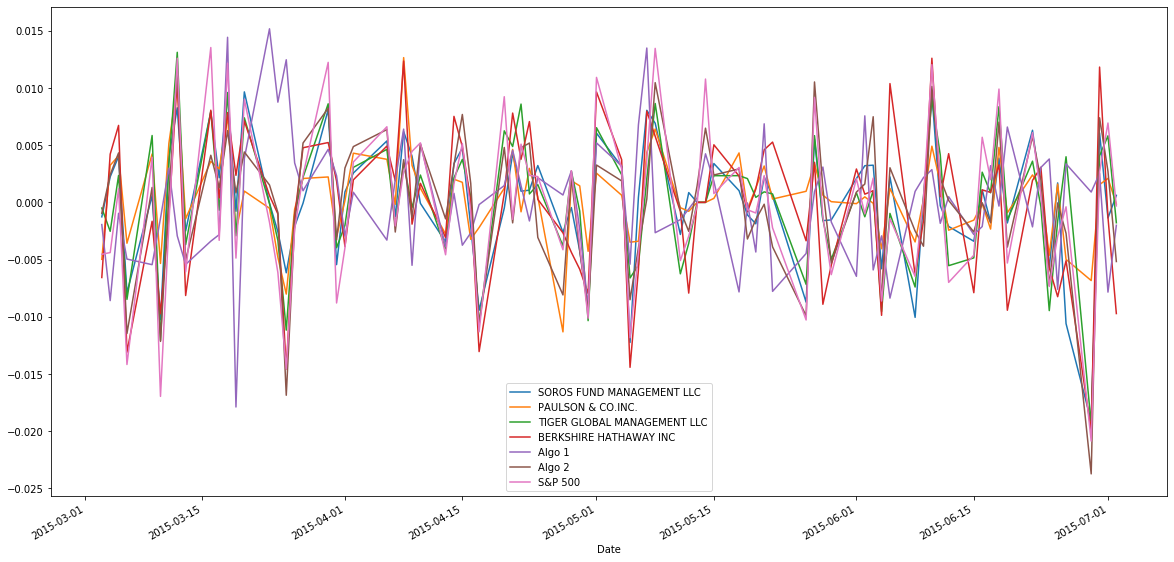

In [26]:
# Plot daily returns of ret_df
ret_df.plot(figsize=(20, 10))

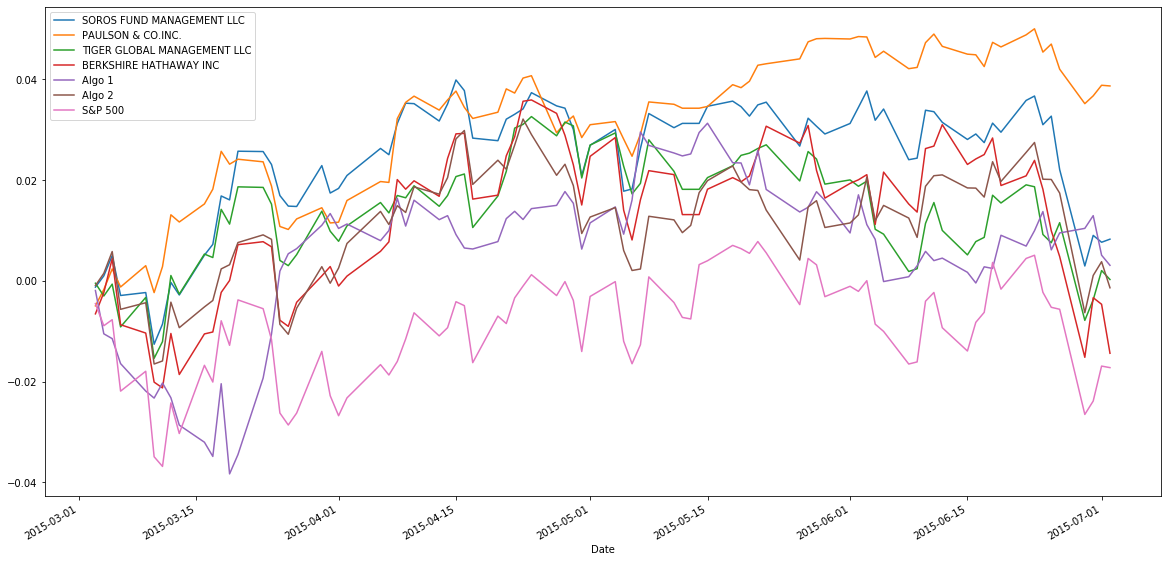

In [27]:
# Plot cummulative returns of ret_df
ret_df = ret_df.cumsum()
ret_df.plot(figsize=(20, 10))